In [191]:
from subprocess import check_output
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
print(check_output(["ls", "data"]).decode("utf8"))

import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn import metrics
from sklearn.manifold import TSNE

data = pd.read_csv("data/hmeq.csv")
data.groupby('BAD').size()

hmeq.csv



BAD
0    4771
1    1189
dtype: int64

In [192]:
data.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [193]:
data.dropna(inplace=True)

In [194]:
#Пустые значения
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [195]:
data['JOB'].unique()

array(['Other', 'Office', 'Mgr', 'ProfExe', 'Sales', 'Self'], dtype=object)

In [196]:
#Размерность таблицы
data.shape

(3364, 13)

In [197]:
data.groupby('BAD').size()

BAD
0    3064
1     300
dtype: int64

In [198]:
#Замена строковых типов числовым
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,0,343,90,1,2,9,0,0,552,1,8,2104
7,1,1,313,117,1,2,11,0,0,370,0,8,2057
19,0,2,2688,2457,1,1,2,0,0,407,0,13,1117
25,1,3,420,171,1,0,12,0,0,155,1,21,2341
26,0,3,2621,2366,1,1,4,0,0,450,0,13,893


In [199]:
#Проверка замены типов
data['JOB'].unique()

array([2, 1, 0, 3, 4, 5])

In [200]:
#X = data.drop('BAD', axis=1)
#y = data['BAD']
#X.head()

In [201]:
np.unique(y)

array([0, 1, 2, 3], dtype=int32)

In [202]:
categorical_features = ['BAD']
continious_features = ['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'CLNO', 'DEBTINC']
data[continious_features].describe()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,CLNO,DEBTINC
count,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.00000,3364.000000,3364.000000,3364.000000,3364.00000
mean,157.778537,1659.676576,1664.389417,0.295779,1.947979,9.105826,0.146849,0.278537,1681.50000,1.037158,22.094530,22.094530,1681.50000
std,90.776529,957.342720,959.990207,0.456460,1.139914,7.580715,0.579524,0.806237,971.24748,1.547576,9.314474,9.314474,971.24748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
25%,91.000000,831.750000,834.750000,0.000000,1.000000,3.000000,0.000000,0.000000,840.75000,0.000000,16.000000,16.000000,840.75000
50%,141.000000,1656.500000,1666.500000,0.000000,2.000000,7.000000,0.000000,0.000000,1681.50000,1.000000,21.000000,21.000000,1681.50000
75%,209.250000,2489.250000,2491.250000,1.000000,3.000000,13.000000,0.000000,0.000000,2522.25000,2.000000,27.000000,27.000000,2522.25000
max,467.000000,3321.000000,3331.000000,1.000000,5.000000,36.000000,10.000000,9.000000,3363.00000,12.000000,56.000000,56.000000,3363.00000


In [203]:
dummies = pd.get_dummies(data['BAD'], prefix=col)
data = pd.concat([data, dummies], axis = 1)
data.drop('BAD', axis = 1, inplace = True)

In [204]:
data.head()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DEBTINC_0,DEBTINC_1
5,0,343,90,1,2,9,0,0,552,1,8,2104,0,1
7,1,313,117,1,2,11,0,0,370,0,8,2057,0,1
19,2,2688,2457,1,1,2,0,0,407,0,13,1117,1,0
25,3,420,171,1,0,12,0,0,155,1,21,2341,0,1
26,3,2621,2366,1,1,4,0,0,450,0,13,893,1,0


In [205]:
data.shape

(3364, 14)

In [206]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [207]:
Sum = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    Sum.append(km.fit(data_transformed).inertia_)

Sum

[3005.223217514277,
 2293.8045742600457,
 1791.374867056888,
 1525.74020728554,
 1417.581353188607,
 1321.564676085205,
 1256.3940495602274,
 1209.0527115492714,
 1153.9238385074311,
 1096.4340252399538,
 1069.9964737425648,
 1029.4263409657615,
 994.8609001849018,
 975.6639349776715]

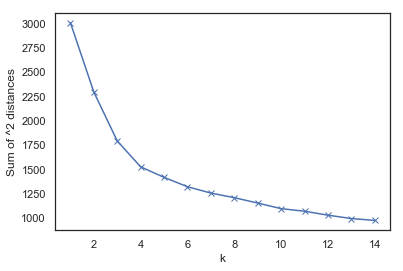

In [208]:
plt.plot(K, Sum, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of ^2 distances')
plt.show()

In [209]:
# clustering
n_clusters = 4
km = KMeans(n_clusters=n_clusters).fit(data)

centroids = km.cluster_centers_
print(centroids)

[[1.46677419e+02 2.06732369e+03 2.02784316e+03 3.25917686e-01
  1.89432703e+00 6.92658509e+00 2.13570634e-01 3.04783092e-01
  8.84694105e+02 1.11790879e+00 2.20689655e+01 1.82963737e+03
  8.94327030e-01 1.05672970e-01]
 [1.38192609e+02 9.18159015e+02 1.08676708e+03 3.56103024e-01
  2.08174692e+00 1.19171333e+01 1.50055991e-01 3.60582307e-01
  2.49998208e+03 8.39865622e-01 2.18185890e+01 1.28517581e+03
  9.55207167e-01 4.47928331e-02]
 [1.39957143e+02 7.35050000e+02 6.32355714e+02 2.51428571e-01
  1.68142857e+00 7.60857143e+00 1.28571429e-01 2.37142857e-01
  7.48947143e+02 1.20428571e+00 1.75728571e+01 1.56311143e+03
  8.38571429e-01 1.61428571e-01]
 [2.03587156e+02 2.74102867e+03 2.70968234e+03 2.38532110e-01
  2.08027523e+00 9.67545872e+00 8.94495413e-02 2.00688073e-01
  2.41339335e+03 1.02178899e+00 2.60332569e+01 2.02968119e+03
  9.40366972e-01 5.96330275e-02]]


In [210]:
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('DEBTINC_0', 1))
X = scaler.fit_transform(data.drop('DEBTINC_1', 1))

data['cluster'] = km.fit_predict(X)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [211]:
data.head(5)

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DEBTINC_0,DEBTINC_1,cluster
5,0,343,90,1,2,9,0,0,552,1,8,2104,0,1,1
7,1,313,117,1,2,11,0,0,370,0,8,2057,0,1,1
19,2,2688,2457,1,1,2,0,0,407,0,13,1117,1,0,2
25,3,420,171,1,0,12,0,0,155,1,21,2341,0,1,1
26,3,2621,2366,1,1,4,0,0,450,0,13,893,1,0,2


In [212]:
data.groupby('DEBTINC_0').size()

DEBTINC_0
0     300
1    3064
dtype: int64

In [213]:
val_1 = data[(data.DEBTINC_1 == 0) & (data.cluster == 0)]
val_1.size

19365

In [214]:
val_2 = data[(data.DEBTINC_0 == 1) & (data.cluster == 1)]
val_2.size

105

In [215]:
data.size - val_1.size - val_2.size

30990

In [216]:
algorithms = []
algorithms.append(km)
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=2, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=2))

y = data['cluster']
dt = []
for algo in algorithms:
    algo.fit(X)
    dt.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=dt, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,1.000000,1.000000,1.000000,1.000000,1.000000,0.125941
Affinity,0.019951,0.204605,0.955321,0.224275,0.363268,0.431096
Spectral,0.008874,0.013347,0.013695,0.114406,0.024461,-0.001198
Agglomerative,0.196767,0.222310,0.222581,0.512120,0.310299,0.089921


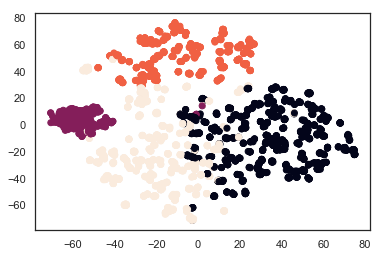

In [217]:
# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(X)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=y)
plt.show()